In [30]:
import pyforest
import scipy.stats as st
from statsmodels.stats.proportion import proportion_confint,proportions_ztest

In [31]:
import os
os.getcwd()

'C:\\Users\\Ranjani\\DSML\\Statistics'

In [32]:
df =pd.read_csv("cars_dataset.csv")
df.sample(5)

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
4745,4883,Force One SX ABS 7 Seating,2014,555000,147279,Diesel,Individual,Manual,Second Owner,17.0 kmpl,2200 CC,139.01 bhp,7,Jamshedpur,832102,N
7322,7533,Skoda Octavia Ambiente 1.9 TDI MT,2007,195000,175000,Diesel,Individual,Manual,Second Owner,18.7 kmpl,1896 CC,66 bhp,5,Delhi,110039,N
3442,3552,Honda City 2017-2020 GXi,2008,200000,110000,Petrol,Individual,Manual,Second Owner,17.7 kmpl,1497 CC,78 bhp,5,Ludhiana,141003,N
5209,5358,Hyundai Elite i20 Asta Option CVT BSIV,2018,800000,25000,Petrol,Individual,Automatic,First Owner,17.4 kmpl,1197 CC,81.86 bhp,5,Patna,801110,N
4072,4196,Mahindra Marazzo M8,2019,1460000,5000,Diesel,Individual,Manual,First Owner,17.3 kmpl,1497 CC,121 bhp,7,Ludhiana,141003,N


In [33]:
df.shape

(7906, 16)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   name           7906 non-null   object
 2   year           7906 non-null   int64 
 3   selling_price  7906 non-null   int64 
 4   km_driven      7906 non-null   int64 
 5   fuel           7906 non-null   object
 6   seller_type    7906 non-null   object
 7   transmission   7906 non-null   object
 8   owner          7906 non-null   object
 9   mileage        7906 non-null   object
 10  engine         7906 non-null   object
 11  max_power      7906 non-null   object
 12  seats          7906 non-null   int64 
 13  City           7906 non-null   object
 14  Postal_code    7906 non-null   int64 
 15  Sales_status   7906 non-null   object
dtypes: int64(6), object(10)
memory usage: 988.4+ KB


In [35]:
df.isnull().sum()

Sales_ID         0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
City             0
Postal_code      0
Sales_status     0
dtype: int64

In [36]:
import pandas as pd


In [37]:
df.describe()

,Sales_ID,year,selling_price,km_driven,seats,Postal_code
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,5.416393,503806.024285
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,0.959208,205061.544757
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,2.000000,110039.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,5.000000,391510.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,5.000000,524225.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,5.000000,680503.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,14.000000,834008.000000


In [38]:
columns = ['mileage', 'engine', 'max_power']
    

In [39]:
for i in columns:
    df[i] = df[i].apply(lambda x: float(x.split()[0]))

In [40]:
df.sample(10)

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
7882,8105,Honda City 2017-2020 VTEC,2006,160000,70000,Petrol,Individual,Manual,Second Owner,16.90,1497.0,100.00,5,Thrissur,680503,N
3798,3917,Maruti Swift Dzire ZDi,2011,350000,120000,Diesel,Individual,Manual,Second Owner,19.30,1248.0,73.90,5,Kochi,682001,N
5464,5621,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79,998.0,67.05,5,Kolkata,700027,N
4322,4454,Mahindra Scorpio 2009-2014 EX 2WD 9S,2014,655000,50000,Diesel,Individual,Manual,Second Owner,14.00,2523.0,75.00,9,Thrissur,680503,N
1660,1711,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5,Nellore,524225,Y
2472,2559,Chevrolet Spark 1.0 PS,2010,125000,70000,Petrol,Individual,Manual,First Owner,16.00,995.0,63.00,5,Jamshedpur,832102,N
4976,5121,Tata Tiago 1.2 Revotron XM,2017,350000,60000,Petrol,Individual,Manual,First Owner,23.84,1199.0,84.00,5,Indore,453551,N
2856,2950,Honda Jazz VX CVT,2019,750000,3100,Petrol,Individual,Automatic,First Owner,18.20,1199.0,88.70,5,Chennai,600020,N
430,445,Maruti 800 Std,2010,120000,70000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4,Patna,801110,Y
2990,3087,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.20,1199.0,88.70,5,Aurangabad,431001,N


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   name           7906 non-null   object 
 2   year           7906 non-null   int64  
 3   selling_price  7906 non-null   int64  
 4   km_driven      7906 non-null   int64  
 5   fuel           7906 non-null   object 
 6   seller_type    7906 non-null   object 
 7   transmission   7906 non-null   object 
 8   owner          7906 non-null   object 
 9   mileage        7906 non-null   float64
 10  engine         7906 non-null   float64
 11  max_power      7906 non-null   float64
 12  seats          7906 non-null   int64  
 13  City           7906 non-null   object 
 14  Postal_code    7906 non-null   int64  
 15  Sales_status   7906 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory usage: 988.4+ KB


In [42]:
df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,Postal_code
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,503806.024285
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208,205061.544757
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,110039.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,391510.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,524225.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,680503.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,834008.000000


In [43]:
df.fuel.value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

In [44]:
df.transmission.value_counts()

transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

In [45]:
df.seller_type.value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [46]:
mean_individual_sellers = df[df['seller_type']=="Individual"]
mean_individual_sellers.selling_price.mean()


507705.8235563005

In [47]:
mean_dealer_sellers = df[df['seller_type']=="Dealer"]
mean_dealer_sellers.selling_price.mean()

1459909.6269196025

In [48]:
#IQR: 

price_iqr = df['selling_price'].quantile(0.75) - df['selling_price'].quantile(0.25)
price_iqr

420000.0

a) What are the characteristics of the cars listed in the used car dataset? Specifically, what is the average 
mileage and selling price of the cars? 
Ans: Average mileage is at 19.419861 kmpl; Average SP of cars is at Rs 6,49,813.7

What is the range of prices? What is the interquartile range of prices? 
Ans: Range = max-min = 1.000000e+07 - 2.999900e+04 = Rs 99,70,001

     Interquartile range of prices = 420000.0


What is the most common fuel type and transmission type? 
Ans: The most common type of fuel is Diesel
     The most common type of transmission is Manual


Additionally, can we observe a 
significant difference in the mean selling price for cars sold by individual sellers compared to those sold 
by dealers in the used car dataset?
Ans: We see that the mean SP of cars is Rs 5,07,705 when individuals sell them and mean SP of cars is Rs 14,59,909 when dealers sell it, giving a difference of Rs 9,52,204. Thus we can say that yes, there is a significant difference

In [49]:
# with consideration that $10000 could be a typing error

prob = df[df["selling_price"] > 10000]
prob1 = prob[prob['transmission'] == "Automatic"].shape[0]
prob1

1041

In [50]:
prob_of_automatic_transmission = prob1/len(df)
prob_of_automatic_transmission

0.13167214773589678

In [51]:
#With converting $1 = Rs 83.54
# $10000 = Rs 8,35,400

probability = df[df["selling_price"] > 835400]
prob2 = probability[probability['transmission'] == "Automatic"].shape[0]
prob2


605

In [52]:
prob2/len(df)

0.07652415886668353

Q(2) (3 Marks)
a) In the context of analyzing the used car market, can we determine if there is a significant difference in 
prices of cars based on the fuel type they use? This information can help buyers make informed decisions 
when purchasing a used car and may also inform government policies aimed at promoting the use of 
certain types of fuel in vehicles. (frame hypothesis and draw inferences)

C:\Users\Ranjani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


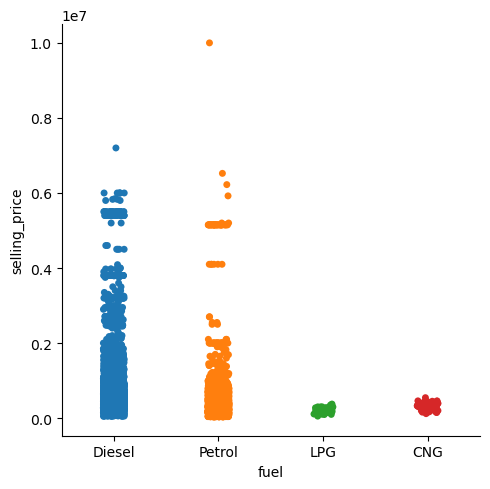

In [53]:
import seaborn as sns

sns.catplot(x="fuel", y="selling_price", hue= "fuel", data=df)

From the first glimpse, it looks like many cars belonging to petrol and diesel are sold the most. Hence an analysis between these two categorical values can be made...

In [54]:
fuel_Diesel = df[df.fuel=="Diesel"]['selling_price']
fuel_Petrol = df[df.fuel=="Petrol"]['selling_price']

fuel_Diesel

0       450000
1       370000
3       225000
8       350000
9       200000
         ...  
7900    475000
7902    135000
7903    382000
7904    290000
7905    290000
Name: selling_price, Length: 4299, dtype: int64

In [55]:
# Assuming a random sample
# Assuming independent observations
#Checking for normality
from scipy.stats import shapiro

sample_fuel_Diesel = fuel_Diesel.sample(30)
sample_fuel_Petrol = fuel_Petrol.sample(30)


shapiro_fuel_Diesel = shapiro(sample_fuel_Diesel)
shapiro_fuel_Petrol = shapiro(sample_fuel_Petrol)

shapiro_fuel_Diesel

ShapiroResult(statistic=0.7067093253135681, pvalue=1.9563790374377277e-06)

In [56]:
shapiro_fuel_Petrol

ShapiroResult(statistic=0.9160967469215393, pvalue=0.0212689395993948)

In [58]:
#As both p values < alpha, the datas are not normal

In [59]:
# Checking for variance

st.levene(sample_fuel_Diesel,sample_fuel_Petrol)

LeveneResult(statistic=6.348025858780615, pvalue=0.014528098278780587)

In [60]:
tstat,pvalue =st.ttest_ind(fuel_Diesel,fuel_Petrol,equal_var =True)
tstat

18.124727173371923

In [61]:
pvalue/2 # As it is 2 tailed test

2.9806858780618803e-72

As pvalue<<alpha, reject null; ie Ha is to be accepted; that is there is a significant difference in selling price of diesel vs petrol cars.

Business value: The mean SP for diesel cars is higher than petrol cars and so diesel cars can be better promoted.

In [62]:
#Verifying
fuel_Diesel.mean()

802450.282623866

In [63]:
fuel_Petrol.mean()

472665.203125

In [64]:
# Alternate way: using ANOVA (Analysis of variance): As it is a comparison for significant difference with multiple
#categorical variables

#Ho: There is no significant difference in selling price of diesel vs petrol cars
#Ha: The is a significant difference in selling price of diesel vs petrol cars

from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(df[df['fuel'] == "Petrol"]['selling_price'],
                               df[df['fuel'] == "Diesel"]['selling_price'],
                               df[df['fuel'] == "CNG"]['selling_price'],
                               df[df['fuel'] == "LPG"]['selling_price'])

print(f"Fstatistic: {f_statistic}")
print(f"pvalue: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis; Thus there is a significant difference in prices based on fuel type ")
else:
    print("Fail to reject null; There is no significant difference in prices based on fuel type")

Fstatistic: 117.30554435257852
pvalue: 2.52340474514499e-74
Reject null hypothesis; Thus there is a significant difference in prices based on fuel type 


Inference: There is significant differences in the selling prices of cars based on the fuel type. This will help the government to make decisions on promotion of some kind of vehicles over the others

Q(3) (2+5 Marks)
a) In the used car dataset, there are some mileage values that are represented in units other than miles, such 
as kilometers. Convert these values into miles and check the mileage distribution. (Note: Convert mileage 
in kilometers to miles by multiplying by 0.621371.)
b) You are a data analyst working for a car dealership company. Investigate whether there is a statistically 
significant difference in the distribution of the number of seats between cars with automatic and manual 
transmissions. Perform a hypothesis test to determine whether there is a significant difference in the 
number of seats for cars with automatic and manual transmissions. 
Note: Use appropriate test to check if there is a significant difference in the means of the number of seats 
for the two groups. Determine the appropriate assumptions for the test and verify if they are satisfied. 
Calculate the test statistic and p-value to determine if there is a statistically significant difference between 
the two groups.
Based on your analysis, provide insights to the management team about whether the number of seats is 
significantly different between cars with automatic and manual transmissions. This information will be 
useful in identifying which transmission type is more popular among customers and which features 
customers value the most. It will also help the company make informed decisions on inventory 
management and pricing strategies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   name           7906 non-null   object 
 2   year           7906 non-null   int64  
 3   selling_price  7906 non-null   int64  
 4   km_driven      7906 non-null   int64  
 5   fuel           7906 non-null   object 
 6   seller_type    7906 non-null   object 
 7   transmission   7906 non-null   object 
 8   owner          7906 non-null   object 
 9   mileage        7906 non-null   float64
 10  engine         7906 non-null   float64
 11  max_power      7906 non-null   float64
 12  seats          7906 non-null   int64  
 13  City           7906 non-null   object 
 14  Postal_code    7906 non-null   int64  
 15  Sales_status   7906 non-null   object 
 16  Mileage_miles  7906 non-null   object 
dtypes: float64(3), int64(6), object(8)
memory usage: 1.0

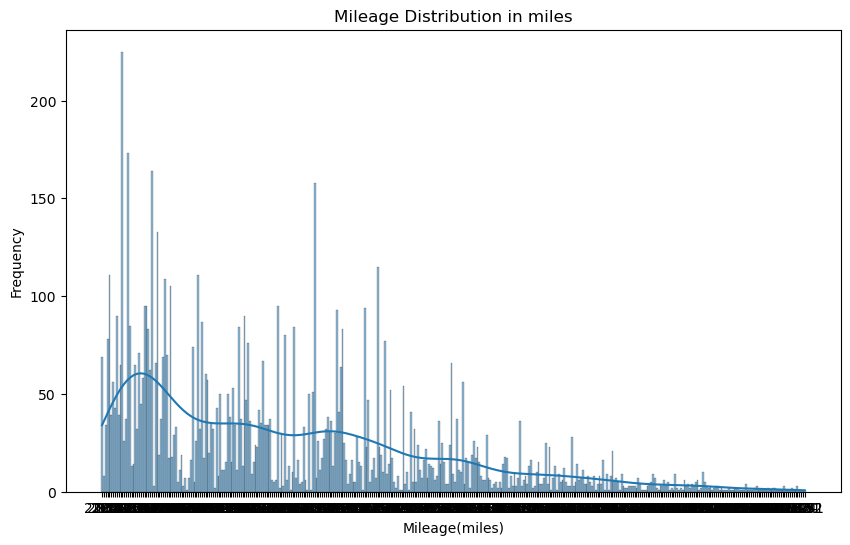

In [66]:
# Q3) a) 
#Convert mileage values in km to miles

df.info()

#Create new column for mileage
df['Mileage_miles'] = df['mileage'].astype(str)
df.loc[df['Mileage_miles'].str.contains('km/kg', na =False), 'Mileage_miles'] = df['Mileage_miles'].str.replace('km/kg','').astype(float)*0.621371
df.loc[df['Mileage_miles'].str.contains('kmpl', na =False), 'Mileage_miles'] = df['Mileage_miles'].str.replace('kmpl','').astype(float)*0.621371

#Check mileage distribution
mileage_stats =df['Mileage_miles'].describe()
print("Mileage distribution in miles:")
print(mileage_stats)

#Plot mileage distribution:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.histplot(df['Mileage_miles'],bins = 20, kde =True)
plt.xlabel('Mileage(miles)')
plt.ylabel('Frequency')
plt.title('Mileage Distribution in miles')
plt.show()

In [67]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status,Mileage_miles
0,1,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Mumbai,400001,Y,23.4
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Ranchi,834008,Y,21.14
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Noida,201301,Y,17.7
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Dehradun,248141,Y,23.0
4,5,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Chennai,600020,Y,16.1


In [68]:
transmission_automatic = df[df.transmission=="Automatic"]['seats']
transmission_manual = df[df.transmission=="Manual"]['seats']

transmission_automatic



39      5
42      5
47      5
53      7
55      5
       ..
7838    5
7843    5
7860    5
7865    5
7886    5
Name: seats, Length: 1041, dtype: int64

Ho: Mean seats in automatic cars is the same as mean seats in manual cars
Ha: Mean seats in automatic cars is not the same as mean seats in manual cars


In [69]:
# Drawing out a sample population:

sample_automatic_transmission = transmission_automatic.sample(30)
sample_transmission_manual = transmission_manual.sample(30)

#Testing an independent t test at 95% CI
alpha = 0.05


In [70]:
# Checking for assumptions:
# Assuming a random sample
# Assuming independent observations
#Normality:

from scipy.stats import shapiro

shapiro_sample_automatic_transmission = shapiro(sample_automatic_transmission)
shapiro_sample_transmission_manual = shapiro(sample_transmission_manual)

print("Shapiro test for automatic transmission: ", shapiro_sample_automatic_transmission )
print("Shapiro test for manual transmission: ", shapiro_sample_transmission_manual )

Shapiro test for automatic transmission:  ShapiroResult(statistic=0.35991764068603516, pvalue=2.3370144708323437e-10)
Shapiro test for manual transmission:  ShapiroResult(statistic=0.5420358180999756, pvalue=1.535043203659825e-08)


As the p values for both samples: sample-automatic and sample-manual < 0.05, the samples are not normal

In [71]:
# Test for variance: Levene's test

from scipy.stats import levene

levene_test = levene(sample_automatic_transmission, sample_transmission_manual)
levene_test


LeveneResult(statistic=2.1637305699481857, pvalue=0.14670614282270109)

As pvalue > alpha, the two variances are equal

In [72]:
# Perform independent t-test

ind_t_statistic, pvalue = stats.ttest_ind(sample_automatic_transmission,sample_transmission_manual)

<IPython.core.display.Javascript object>

In [73]:
ind_t_statistic

-1.4709624638134688

In [74]:
#pvalue divided by 2 as it is two tailed test

pvalue/2

0.07335307141135032

Conclusion: The pvalue > alpha: Thus fail to reject null hypothesis: That is we can say that Mean seats in automatic cars is the same as mean seats in manual cars.

Business proposition: As there is no effect or significant difference on number of seats in manual and automatic transmission, we cannot say one type is better than the other. hence inventory should be kept for both.



In [75]:
#verifying
transmission_automatic.mean()

5.2372718539865515

In [76]:
transmission_manual.mean()

5.443554260742899